# Boxplot

Boxplot is probably one of the most common type of graphic. It gives a nice __summary__ of one or several __numeric variables__. The line that divides the box into 2 parts represents the __median__ of the data. 

The end of the box shows the __upper and lower quartiles__. The extreme lines shows the highest and lowest value __excluding outliers__. Note that boxplot hide the number of values existing behind the variable. 

Thus, it is highly advised to print the number of observation, add unique observation with jitter or __use a violin plot if you have many observations__.

## Overview
1. Basic Boxplot
    - 1.1 One numerical variable only
    - 1.2 One numerical variable, and several groups
    - 1.3 Several numerical variable
2. Control colors of boxplot
    - 2.1 Use a color palette
    - 2.2 Uniform color
    - 2.3 Specific color for each group
    - 2.4 Highlight a group
    - 2.5 Add transparency to color
3. Grouped Boxplot
4. Control order of Boxplot
    - 4.1 Use a specific order
    - 4.2 By decreasing median
5. Add jitter over Boxplot 
6. Show number of Observation
7. Custom Boxplot appearance 
    - 7.1 Custom line width
    - 7.2 Add notch
    - 7.3 Control box sizes
8. Hidden data under Boxplot
    - 8.1 Add Jitter
    - 8.2 Violin Plot
    - 8.3 Show number of obs

## 1. Basic Boxplot
Boxplot are made using the … boxplot() function! Three types of input can be used to make a boxplot:

### 1.1 One numerical variable only
If you have only one numerical variable, you can use this code to get a boxplot with only one group.

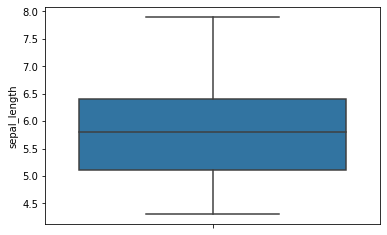

In [1]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Make boxplot for one group only
sns.boxplot(y=df["sepal_length"] )

### 1.2 One numerical variable, and several groups
Let’s say we want to study the distribution of a numerical variable, but for each group separately. Here we study the sepal length of 3 species of flower.

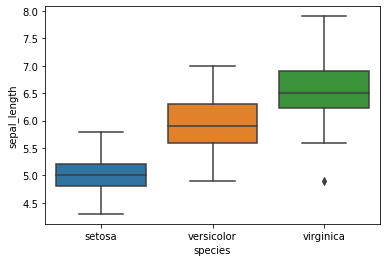

In [2]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

sns.boxplot(x=df["species"], y=df["sepal_length"] )

### 1.3 Several numerical variable
Finally we can study the distribution of several numerical variables, let’s say sepal length and width:

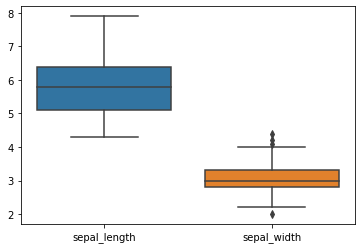

In [3]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

sns.boxplot(data=df.iloc[:,0:2])

## 2. Control colors of boxplot

This post gives 5 tips to manage the color of your seaborn boxplot:

### 2.1 Use a color palette
Python proposes several color palettes. You can call RColorBrewer palette like Set1, Set2, Set3, Paired, BuPu… 

There are also __Sequential color palettes__ like Blues or BuGn_r. Read the great [documentation](http://seaborn.pydata.org/tutorial/color_palettes.html) of seaborn to learn more, and check the code below to understand how to apply it.

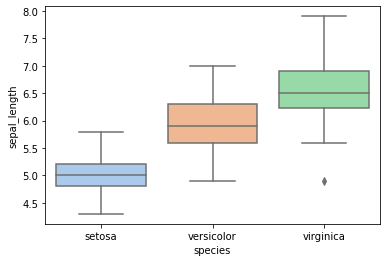

In [4]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Use a color palette: deep, muted, pastel, bright, dark, Reds, Blues
sns.boxplot( x=df["species"], y=df["sepal_length"], palette="pastel")

### 2.2 Uniform color
Of course you can easily apply an uniform color to every boxes. Find a list of the numerous colors you can use [here](http://matplotlib.org/examples/color/named_colors.html). The most common ones are b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

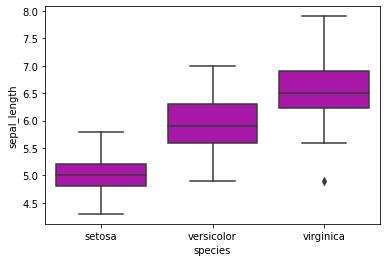

In [5]:
import seaborn as sns
df = sns.load_dataset('iris')
sns.boxplot( x=df["species"], y=df["sepal_length"], color="m") # color="magenta"

### 2.3 Specific color for each group

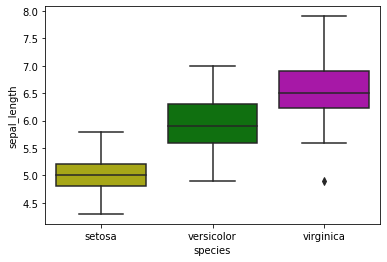

In [6]:
import seaborn as sns
df = sns.load_dataset('iris')

my_pal = {"versicolor": "g", "setosa": "y", "virginica":"m"}

sns.boxplot(x=df["species"], y=df["sepal_length"], palette=my_pal)

### 2.4 Highlight a group

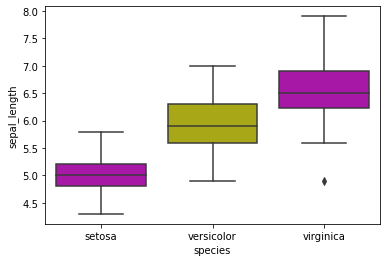

In [7]:
import seaborn as sns
df = sns.load_dataset('iris')

my_pal = {species: "y" if species == "versicolor" else "m" for species in df.species.unique()}

sns.boxplot( x=df["species"], y=df["sepal_length"], palette=my_pal)

### 2.5 Add transparency to color

I personally think that charts look better with transparency. I find out how to do it using the post of mwaskom on Github.

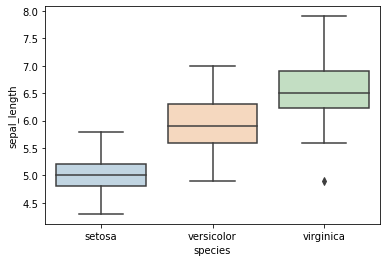

In [8]:
# import library and dataset
import seaborn as sns
df = sns.load_dataset('iris')

# usual boxplot
ax = sns.boxplot(x='species', y='sepal_length', data=df)

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

## 3. Grouped Boxplot

Grouped boxplot are used when you __have a numerical variable__, several __groups__ and __subgroups__.

__Y__ is your numerical variable, __x__ is the group column, and __hue__ is the subgroup column.

In [9]:
# library and dataset
import seaborn as sns
df = sns.load_dataset('tips')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


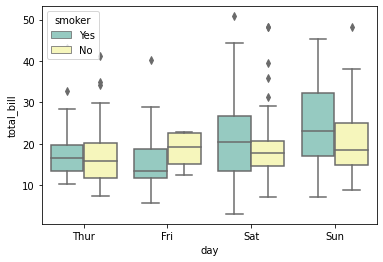

In [10]:
# Grouped boxplot
sns.boxplot(x="day", y="total_bill", hue="smoker", data=df, palette="Set3") # Set1, Set2, Set3

## 4. Control order of Boxplot
Boxplots often give more information if you order group in a specific order.

### 4.1 Use a specific order    

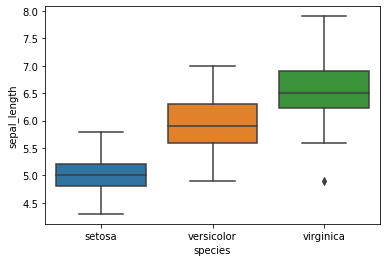

In [11]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# specific order
p1=sns.boxplot(x='species', 
               y='sepal_length', 
               data=df, 
               order=["setosa", "versicolor", "virginica"])

### 4.2 By decreasing median

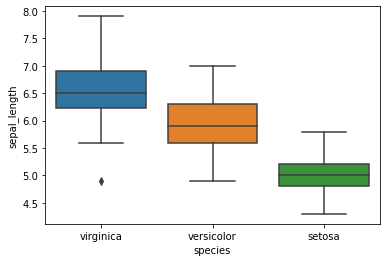

In [12]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Find the order
my_order = df.groupby(by=["species"])["sepal_length"].median().iloc[::-1].index

# Give it to the boxplot
sns.boxplot(x='species', y='sepal_length', data=df, order=my_order)

## 5. Add jitter over Boxplot 
Boxplot is an amazing way to study distributions. However, note that different type of distribution can be hidden under the same box.

Thus, it is highly advised to display every observations over your boxplot, to be sure not to miss an interesting pattern. Note that violin plots can be an interesting alternative if you have many many observations.

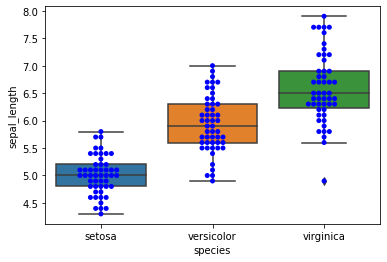

In [13]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Usual boxplot
ax = sns.boxplot(x='species', y='sepal_length', data=df)

# Add jitter with the swarmplot function.
ax = sns.swarmplot(x='species', y='sepal_length', data=df, color="blue") # gray, red, yellow

## 6. Show number of Observation
Boxplot is an amazing way to study distributions. However, it can be useful to display the number of observation for each group since this info is hidden under boxes.

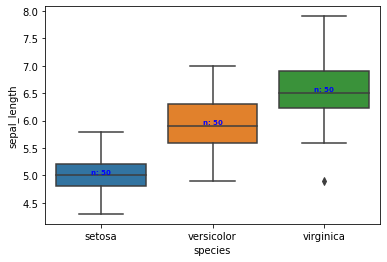

In [14]:
# library & dataset
import seaborn as sns, numpy as np
df = sns.load_dataset("iris")

ax = sns.boxplot(x="species", y="sepal_length", data=df)

# Calculate number of obs per group & median to position labels
medians = df.groupby(['species'])['sepal_length'].median().values
nobs = df['species'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='x-small', color='b', weight='semibold')

## 7. Custom Boxplot appearance 
This post aims to describe 3 customizations you can apply

### 7.1 Custom line width

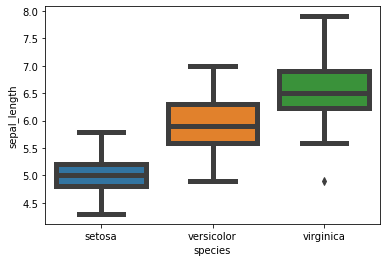

In [15]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Change line width
sns.boxplot( x=df["species"], y=df["sepal_length"], linewidth=5)

### 7.2 Add notch

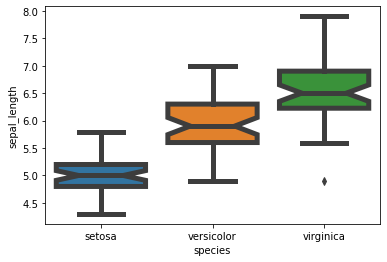

In [16]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Add notch
sns.boxplot( x=df["species"], y=df["sepal_length"], linewidth=5, notch=True)

### 7.3 Control box sizes

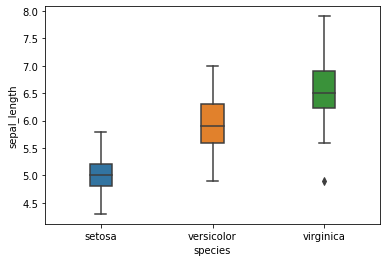

In [17]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Change width
sns.boxplot( x=df["species"], y=df["sepal_length"], width=0.2)

## 8. Hidden data under Boxplot
This page is dedicated to the dangerous feature of boxplots. A boxplot __summarizes the distribution__ of a numeric variable for several groups. The problem is than summarizing also means __loosing information__, and that can become a mistake.

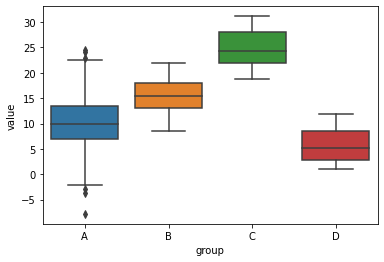

In [18]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df=a.append(b).append(c).append(d).append(e)

# Usual boxplot
sns.boxplot(x='group', y='value', data=df)

If we consider the boxplot beside, it is easy to conclude that the ‘C’ group has a higher value than the others. However, we cannot see what is the __underlying distribution__ of dots into each group, neither the number of __observation__ for each.

Let’s see a few techniques allowing to avoid that:

### 8.1 Add Jitter

Text(0.0, 1.0, 'Boxplot with jitter')

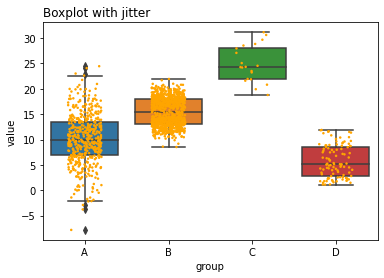

In [19]:
ax = sns.boxplot(x='group', y='value', data=df)
ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")

### 8.2 Violin Plot

Text(0.0, 1.0, 'Violin plot')

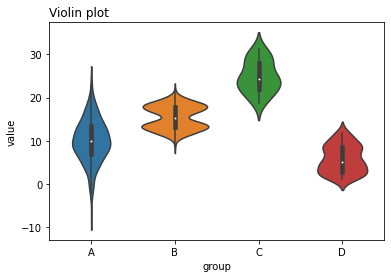

In [20]:
sns.violinplot( x='group', y='value', data=df)
plt.title("Violin plot", loc="left")

### 8.3 Show number of obs

Text(0.0, 1.0, 'Boxplot with number of observation')

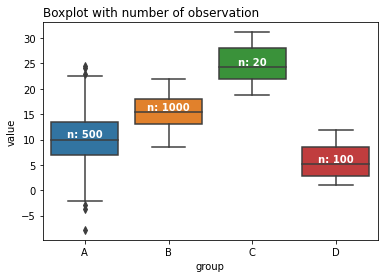

In [21]:
# Start with a basic boxplot
sns.boxplot(x="group", y="value", data=df)

# Calculate number of obs per group & median to position labels
medians = df.groupby(['group'])['value'].median().values
nobs = df.groupby("group").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], 
             medians[tick] + 0.4, 
             nobs[tick], 
             horizontalalignment='center', 
             size='medium', 
             color='w', 
             weight='semibold')

# add title
plt.title("Boxplot with number of observation", loc="left")